# Brownian motion
Here I am going to play around with Brownian motion. I'll update this and other comments later once I understand it better. One thing I have read, is that BM can be described as the following:
$$
W(t) = \int_0^t{\rm d}t'\ \mathcal{GP}(0,{\bf I})\,.
$$
That is, BM (or a Weiner process $W(t)$) is characteristic of a Gaussian Process of mean 0 and unit variance that is white noise (diagonal). Conveniently, [George](http://george.readthedocs.io/en/latest/user/gp/) exists, so I can implement this in a second (although Cellerite might be better).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import george
from george import kernels
from scipy.integrate import quad, trapz, cumtrapz

In [2]:
lo, hi = 0, 1
x  = np.linspace(lo, hi)
xp = np.linspace(lo, hi, 1000)

In [3]:
val = -40
print "Setting constant to c = ",np.exp(val)
k = kernels.ConstantKernel(val) #k(x_i, x_j) = 0; sadly, George can't do this well
gp = george.GP(k, white_noise=0) #log of the white noise variance; ln(1) = 0
gp.compute(x)

Setting constant to c =  4.248354255291589e-18


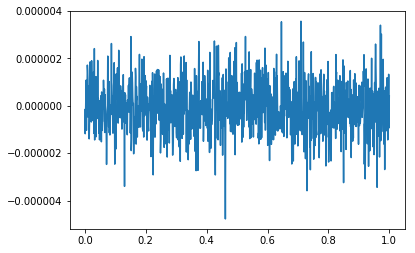

In [4]:
y = gp.sample(xp)
plt.plot(xp, y) #now need to integrate this

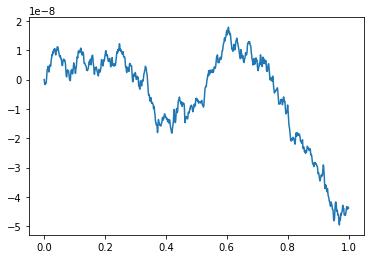

In [5]:
#We will solve for W(t) on the grid defined by xp
Wt = np.zeros_like(y)
Wt[1:] = cumtrapz(y,xp)
plt.plot(xp, Wt)

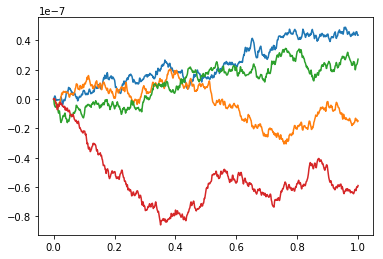

In [7]:
#Cool, let's do a few draws simultaneously
xp = np.linspace(lo, hi, 1000)
def get_Wt():
    y = gp.sample(xp)
    Wt = np.zeros_like(y)
    Wt[1:] = cumtrapz(y,xp)
    return Wt
for i in range(4):
    plt.plot(xp, get_Wt())